In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [44]:
customers_df.head(),
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [45]:
# Merge
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')

agg_data = merged_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

final_df = pd.merge(agg_data, customers_df[['CustomerID', 'Region']], on='CustomerID')
final_df.head(4)


,CustomerID,total_spent,total_transactions,avg_transaction_value,Region
0,C0001,3354.52,5,670.904,South America
1,C0002,1862.74,4,465.685,Asia
2,C0003,2725.38,4,681.345,South America
3,C0004,5354.88,8,669.360,South America
4,C0005,2034.24,3,678.080,Asia


In [46]:
# Select relevant features
X = final_df[['total_spent', 'total_transactions', 'avg_transaction_value']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.06170143, -0.01145819, -0.07026341],
       [-0.87774353, -0.46749414, -0.93493297],
       [-0.40585722, -0.46749414, -0.02627131],
       [ 1.03254704,  1.35664965, -0.0767689 ],
       [-0.78392861, -0.92353008, -0.04002806]])

In [47]:
clusters_range = range(2, 11)
inertia = []
silhouette_scores = []
db_indexes = []

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    db_indexes.append(davies_bouldin_score(X_scaled, kmeans.labels_))

metrics_df = pd.DataFrame({
    'Clusters': clusters_range,
    'Inertia': inertia,
    'Silhouette Score': silhouette_scores,
    'DB Index': db_indexes
})

metrics_df

,Clusters,Inertia,Silhouette Score,DB Index
0,2,340.969034,0.380211,1.007225
1,3,247.120113,0.360273,0.957821
2,4,207.697201,0.313511,1.060424
3,5,150.644119,0.353513,0.852481
4,6,127.997347,0.339305,0.869377
5,7,108.403400,0.339013,0.855311
6,8,96.691699,0.343035,0.912532
7,9,87.327079,0.342879,0.884755
8,10,79.466843,0.349666,0.863046


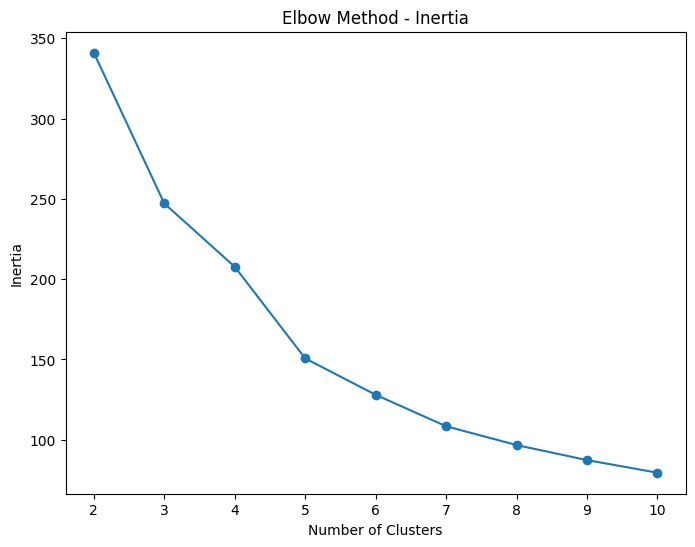

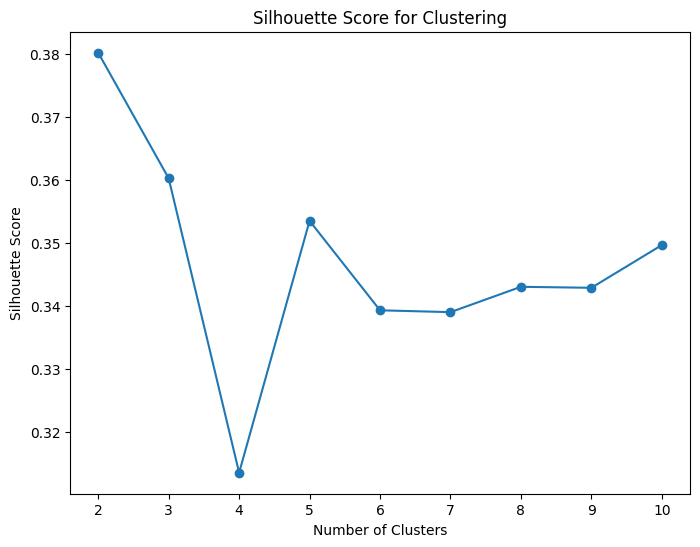

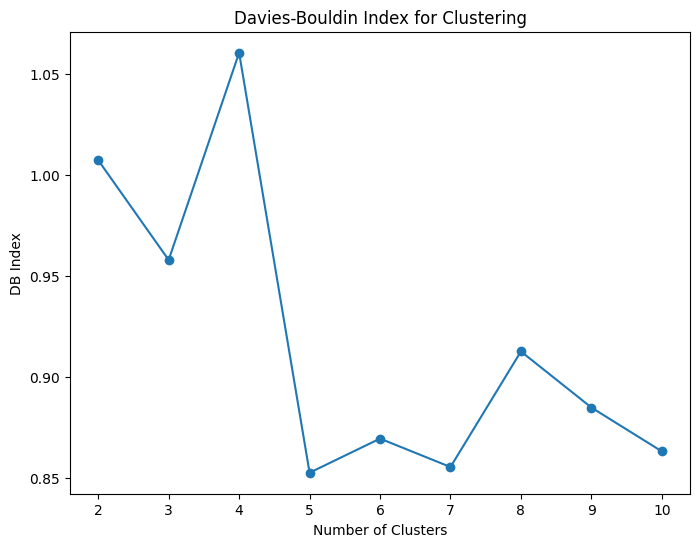

In [49]:
# Elbow Method (Inertia)
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, inertia, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# silhouette score
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Davies bouldin index
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, db_indexes, marker='o')
plt.title('Davies-Bouldin Index for Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()


In [65]:
X_scaled

array([[-6.17014282e-02, -1.14581896e-02, -7.02634115e-02],
       [-8.77743532e-01, -4.67494136e-01, -9.34932971e-01],
       [-4.05857221e-01, -4.67494136e-01, -2.62713110e-02],
       [ 1.03254704e+00,  1.35664965e+00, -7.67688998e-02],
       [-7.83928612e-01, -9.23530083e-01, -4.00280592e-02],
       [ 4.15879421e-01, -4.67494136e-01,  1.55606020e+00],
       [-4.85482293e-01, -9.23530083e-01,  7.26220709e-01],
       [ 4.39970436e-01,  2.26872154e+00, -1.09724996e+00],
       [-1.40630171e+00, -9.23530083e-01, -1.63794564e+00],
       [-9.57166204e-01, -4.67494136e-01, -1.08786883e+00],
       [ 1.43695808e-01, -1.14581896e-02,  2.46146011e-01],
       [ 9.64923716e-01,  9.00613703e-01,  2.51719736e-01],
       [ 1.38575064e+00,  9.00613703e-01,  7.14772302e-01],
       [-1.72239508e+00, -1.83560198e+00, -1.55440798e+00],
       [-1.26353893e+00, -1.37956603e+00, -4.58587130e-01],
       [ 2.22697270e-01, -1.14581896e-02,  3.67845832e-01],
       [ 7.03751732e-01,  1.35664965e+00

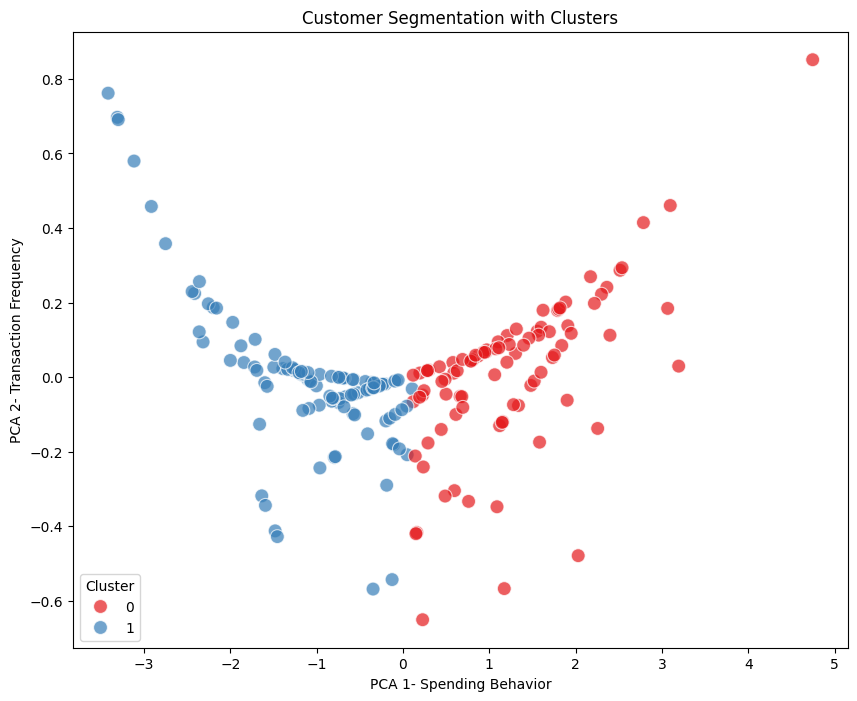

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

#scatterr ploat
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 2], hue=final_df['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation with Clusters')
plt.xlabel('PCA 1- Spending Behavior')
plt.ylabel('PCA 2- Transaction Frequency')
plt.show()
